# Analysis on hybrid results with XGB exploitation

In [1]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

In [2]:
results = glob.glob('../results/performances/xgb-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Collecting Result Files: Results of Individual Experiments

In [3]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 250])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=13).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

loading error: ../results/performances/xgb-result-1603161319.348-hybrid-xgb+random-10.0.csv
loading error: ../results/performances/xgb-result-1603161319.348-xgb-single-10.0.csv
loading error: ../results/performances/xgb-result-1603140596.748-hybrid-xgb+random-10.0.csv
loading error: ../results/performances/xgb-result-1603161319.347-hybrid-xgb+random-10.0.csv
14


### Mdata Simulation Results - Hybrid

In [4]:
full_results.keys()

dict_keys(['real-t,hybrid,xgb/random', 'real-n,hybrid,xgb/random', 'real-t,xgb,-', 'real-n,xgb,-', 'real-m,hybrid,xgb/random', 'real-m,xgb,-'])

The number of trials for each setting (Results are averaged):
real-m,hybrid,xgb/random 3 0.9858
real-m,xgb,- 3 0.9986


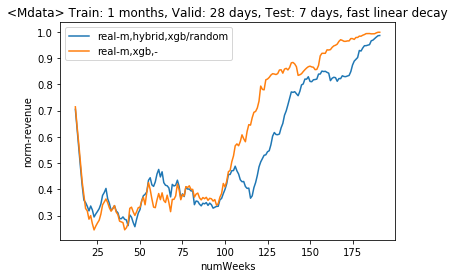

In [5]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


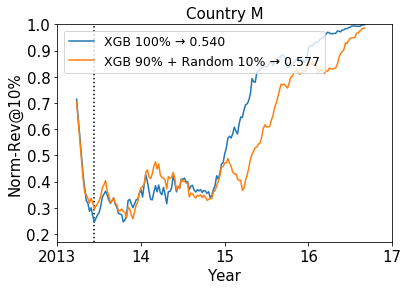

In [6]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-m,xgb,-', 'real-m,hybrid,xgb/random']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-m,hybrid,xgb/random':
        plt.plot(avg_result.index, avg_result, label='XGB 90% + Random 10% → 0.577')
    if key == 'real-m,xgb,-':
        plt.plot(avg_result.index, avg_result, label='XGB 100% → 0.540')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[0,52,104,156,208], labels=['2013', 14, 15, 16,17], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country M', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.17,1)

plt.show()
plt.close()
f.savefig("xgb-hybrid-m.pdf", bbox_inches='tight')

### Tdata Simulation Results - Hybrid

The number of trials for each setting (Results are averaged):
real-t,hybrid,xgb/random 1 0.3681
real-t,xgb,- 3 0.1159


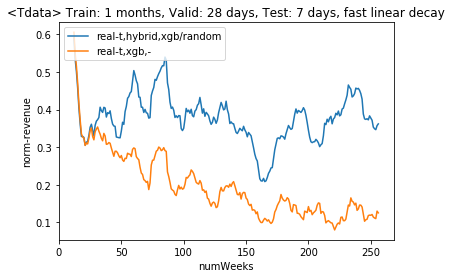

In [9]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')

plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


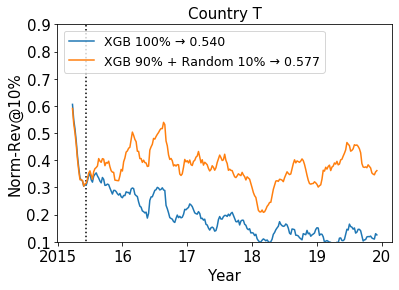

In [10]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-t,xgb,-', 'real-t,hybrid,xgb/random']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-t,hybrid,xgb/random':
        plt.plot(avg_result.index, avg_result, label='XGB 90% + Random 10% → 0.577')
    if key == 'real-t,xgb,-':
        plt.plot(avg_result.index, avg_result, label='XGB 100% → 0.540')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[0,52,104,156,208,260], labels=['2015', 16, 17, 18,19, 20], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country T', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)

plt.ylim(0.1,0.9)
plt.show()
plt.close()
f.savefig("xgb-hybrid-t.pdf", bbox_inches='tight')

### Ndata Simulation Results - Hybrid

The number of trials for each setting (Results are averaged):
real-n,hybrid,xgb/random 1 0.7219
real-n,xgb,- 3 0.7494


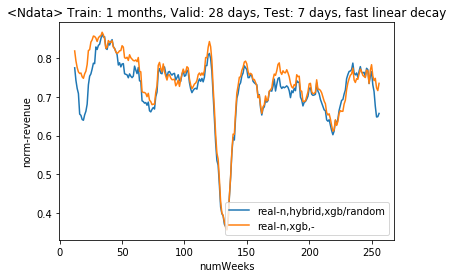

In [11]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)
    
plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.75, 0.85)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


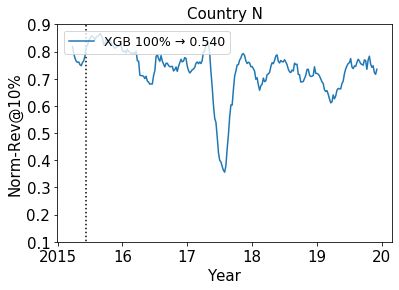

In [13]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-n,xgb,-', 'real-t,hybrid,xgb/random']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-n,hybrid,xgb/random':
        plt.plot(avg_result.index, avg_result, label='XGB 90% + Random 10% → 0.577')
    if key == 'real-n,xgb,-':
        plt.plot(avg_result.index, avg_result, label='XGB 100% → 0.540')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[0,52,104,156,208,260], labels=['2015', 16, 17, 18,19, 20], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country N', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)

plt.ylim(0.1,0.9)
plt.show()
plt.close()
f.savefig("xgb-hybrid-n.pdf", bbox_inches='tight')